This section is a brief exploration into quantum circuits and their implementation in Qiskit. We plan to use `qiskit` and a library `bosonic-qiskit` to program and simualte our quantum circuits. We first followed [Quantum Circuits](https://learning.quantum.ibm.com/course/basics-of-quantum-information/quantum-circuits) to gain some experience with `qiskit`. We also followed some lessons from the [Bosonic Qiskit Textbook](https://github.com/C2QA/bosonic-qiskit/tree/main/tutorials/bosonic-qiskit-textbook) present in the `bosonic-qiskit` Github repository alongside other [tutorials](https://github.com/C2QA/bosonic-qiskit/tree/main/tutorials). 

The following are some basic examples of things we can do with `qiskit`. We begin with a brief look at `qiskit`'s `Statevector` class

In [1]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

x = Statevector([1 / sqrt(2), 1 / sqrt(2)])
y = Statevector([1+3.0j, -1])

In [2]:
display(x.draw("latex"))
display(x.draw("latex_source"))
display(y.draw("text"))


print(f"X is a valid state: {x.is_valid()}")
print(f"Y is a valid state: {y.is_valid()}")

<IPython.core.display.Latex object>

'\\frac{\\sqrt{2}}{2} |0\\rangle+\\frac{\\sqrt{2}}{2} |1\\rangle'

[ 1.+3.j,-1.+0.j]

X is a valid state: True
Y is a valid state: False


We used a variety of options with the `draw` method to display statevectors. We also tested if the statevectors were valid.
***

Below we dive into basic quantum circuits, first starting with some neccessary imports

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

We then create a simple circuit composed of one qubit and draw it.

In [4]:
circuit = QuantumCircuit(1)

circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw())

┌───┐┌───┐┌───┐
q: ┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘

Next we show an example of a circuit with classical and quantum registers along with gates.

In [5]:
X = QuantumRegister(1,"X")
Y = QuantumRegister(1,"Y")
U = ClassicalRegister(1,"U")
V = ClassicalRegister(1, "V")
circuit = QuantumCircuit(X,Y,U,V)

circuit.h(X)
circuit.cx(X,Y[0])
circuit.measure(X,U)
circuit.measure(Y,V)
display(circuit.draw())

┌───┐     ┌─┐   
  X: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
  Y: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
U: 1/═══════════╩══╬═
                0  ║ 
V: 1/══════════════╩═
                   0

We can simulate this circuit using `Sampler` and display a histogram of the results

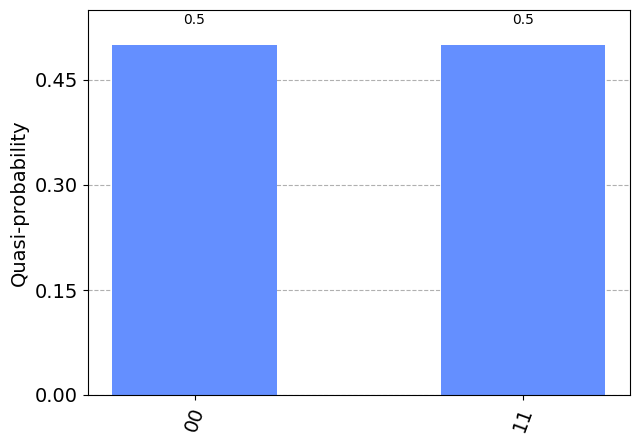

In [6]:
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

***
Next we explored `bosonic-qiskit`

In [7]:
import c2qa #Bosonic-qiskit
import qiskit
import numpy as np

We define a qumode using 4 qubit

In [8]:
qmr = c2qa.QumodeRegister(
    num_qumodes=1,
    num_qubits_per_qumode=4
)

We can initalize this qumode to different states

In [9]:
circuit = c2qa.CVCircuit(qmr)
circuit.cv_initialize([1/np.sqrt(2),1/np.sqrt(2)],qmr[0])

Here are some examples of defining CV, DV, and Classical registers in `bosonic-qiskit`

In [10]:
qmr = c2qa.QumodeRegister(
    num_qumodes=1,
    num_qubits_per_qumode=4
)

qr = qiskit.QuantumRegister(
    size=1
)

cr = qiskit.ClassicalRegister(
    size = 1
)

circuit = c2qa.CVCircuit(qmr, qr, cr)

Here is a visualization of the Wigner Function of a Fock State

In [11]:
import qiskit.visualization

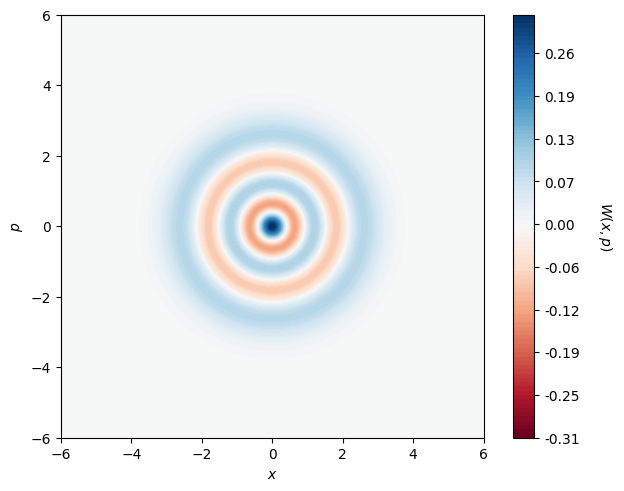

In [12]:
qmr = c2qa.QumodeRegister(1, num_qubits_per_qumode=3) # Create a qumode register with one qumode
circuit = c2qa.CVCircuit(qmr) # Create a CV circuit

circuit.cv_initialize(4, qmr) # Initialize the qumode in the state |4>

# Simulate and plot the wigner function
state,_,_ = c2qa.wigner.simulate(circuit)
plot = c2qa.wigner.plot_wigner(circuit, state) # 5 rings correspond to 4 quanta

This brief exploration into `qiskit` and `bosonic-qiskit` demonstrated the ease of use of implementing quantum circuits in code. However, a deeper understanding of both packages is required to realize a CV-DV quantum circuit and build up further from there. Qiskit integrates nicely with `numpy` and `matplot-lib`, allowing for ample statistics to be gathered and plotted. Currently, we will be limited to simulators due to the lack of available hardware implementations of CV-DV quantum computing open to outside usage and testing.